In [21]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
%matplotlib inline

In [11]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [33]:
df=pd.read_csv('labeledTrainData.tsv',delimiter='\t',quoting=3)

In [34]:
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [35]:
dftest=pd.read_csv('testData.tsv',delimiter='\t',quoting=3)

In [36]:
dftest.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [37]:
df.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [38]:
df.iloc[0]['review']

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [39]:
df.groupby('sentiment').describe()

id                        review         \
           count unique        top freq  count unique   
sentiment                                               
0          12500  12500  "10113_1"    1  12500  12432   
1          12500  12500   "4866_7"    1  12500  12472   

                                                                   
                                                         top freq  
sentiment                                                          
0          "You do realize that you've been watching the ...    3  
1          "Bette Midler is again Divine! Raunchily humor...    2

In [40]:
df['length']=df['review'].apply(len)

In [41]:
df.head()

,id,sentiment,review,length
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",2304
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",948
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",2451
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",2247
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",2233


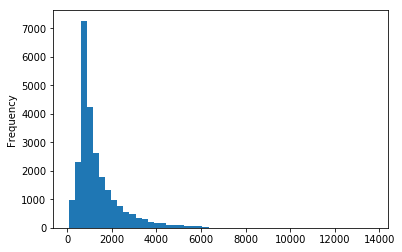

In [42]:
df['length'].plot(bins=50,kind='hist')

In [43]:
from nltk.corpus import stopwords

In [44]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
df.head()

,id,sentiment,review,length
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",2304
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",948
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",2451
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",2247
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",2233


df.head()

In [24]:
df.head()

,id,sentiment,review,length
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",2304
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",948
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",2451
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",2247
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",2233


In [26]:
df.head()

,id,sentiment,review,length
0,"""5814_8""",1,"[stuff, going, moment, MJ, ive, started, liste...",2304
1,"""2381_9""",1,"[Classic, War, Worlds, Timothy, Hines, enterta...",948
2,"""7759_3""",0,"[film, starts, manager, Nicholas, Bell, giving...",2451
3,"""3630_4""",0,"[must, assumed, praised, film, greatest, filme...",2247
4,"""9495_8""",1,"[Superbly, trashy, wondrously, unpretentious, ...",2233


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['review'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

142259


In [48]:
review4 = df['review'][3]
print(review4)

"It must be assumed that those who praised this film (\"the greatest filmed opera ever,\" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \"about\" should be allowed anywhere near a theatre or film studio; Syberberg, very fashionably, but without the smallest justification from Wagner's text, decided that Parsifal is \"about\" bisexual integration, so that the title character, in the latter stages, transmutes into a kind of beatnik babe, though one who continues to sing high tenor -- few if any of the actors in the film are the singers, and we get a double 

In [49]:
bow4 = bow_transformer.transform([review4])
print(bow4)
print(bow4.shape)

  (0, 795)	1
  (0, 4326)	1
  (0, 4509)	1
  (0, 5174)	1
  (0, 5502)	1
  (0, 7103)	1
  (0, 7160)	1
  (0, 13357)	1
  (0, 14378)	1
  (0, 18321)	1
  (0, 21427)	1
  (0, 23269)	1
  (0, 24074)	1
  (0, 29077)	2
  (0, 29251)	1
  (0, 30561)	1
  (0, 37097)	1
  (0, 37796)	1
  (0, 41349)	2
  (0, 49017)	1
  (0, 50467)	1
  (0, 50617)	1
  (0, 52392)	2
  (0, 57330)	1
  (0, 57334)	2
  :	:
  (0, 129049)	1
  (0, 129087)	1
  (0, 129974)	1
  (0, 130425)	1
  (0, 131590)	1
  (0, 131675)	1
  (0, 131888)	1
  (0, 131891)	1
  (0, 132017)	2
  (0, 132403)	1
  (0, 132602)	2
  (0, 132649)	1
  (0, 133323)	1
  (0, 134171)	1
  (0, 134257)	1
  (0, 134566)	1
  (0, 134805)	1
  (0, 134959)	1
  (0, 136225)	1
  (0, 136382)	1
  (0, 136558)	1
  (0, 138347)	1
  (0, 138362)	1
  (0, 139118)	1
  (0, 140518)	1
(1, 142259)


In [50]:
review_bow = bow_transformer.transform(df['review'])

In [101]:
print(review_bow.shape)

(25000, 142259)


In [102]:
print('Shape of Sparse Matrix: ', review_bow.shape)
print('Amount of Non-Zero occurences: ', review_bow.nnz)

Shape of Sparse Matrix:  (25000, 142259)
Amount of Non-Zero occurences:  2578311


In [104]:
sparsity = (100.0 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [105]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)


In [106]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 140518)	0.032974725850229133
  (0, 139118)	0.025066230861653847
  (0, 138362)	0.059743001486996856
  (0, 138347)	0.045464053909826024
  (0, 136558)	0.09032229265738914
  (0, 136382)	0.06455196228286461
  (0, 136225)	0.07426997386418267
  (0, 134959)	0.08660271775291917
  (0, 134805)	0.09286436458478635
  (0, 134566)	0.1014348717369922
  (0, 134257)	0.10553619403635796
  (0, 134171)	0.1014348717369922
  (0, 133323)	0.04095781212670375
  (0, 132649)	0.05870464390024038
  (0, 132602)	0.06171158178921501
  (0, 132403)	0.025796209881522515
  (0, 132017)	0.11711538126394004
  (0, 131891)	0.09626781671809277
  (0, 131888)	0.06412146729777787
  (0, 131675)	0.08741235817651762
  (0, 131590)	0.10553619403635796
  (0, 130425)	0.09852493725612067
  (0, 129974)	0.055696503741289455
  (0, 129087)	0.0528971179606357
  (0, 129049)	0.05420027603666906
  :	:
  (0, 57334)	0.17851311987571097
  (0, 57330)	0.07749116691540882
  (0, 52392)	0.1857287291695727
  (0, 50617)	0.06860940119284835
  (0, 5046

In [107]:
review_tfidf = tfidf_transformer.transform(review_bow)
print(review_tfidf.shape)

(25000, 142259)


In [122]:
from sklearn import ensemble,model_selection,linear_model,svm

In [111]:
#fitting model through naivebayes
from sklearn.naive_bayes import MultinomialNB
sentiment_detect_model = MultinomialNB().fit(review_tfidf, df['sentiment'])

In [ ]:
#Tuning parameters for LogisticRegression in order to check which parameter is best
lr_estimator = linear_model.LogisticRegression(random_state=100)
lr_grid = {'C':[0.1, 0.5, 1], 'penalty':['l1','l2'], 'max_iter':[100,200,300]}
grid_lr_estimator = model_selection.GridSearchCV(lr_estimator, lr_grid, cv=10, return_train_score=True)
grid_lr_estimator.fit(review_tfidf, df['sentiment'])
best_est = grid_lr_estimator.best_estimator_
print(grid_lr_estimator.best_score_)
print(grid_lr_estimator.best_params_)
print(grid_lr_estimator.cv_results_.get('mean_train_score'))
print(grid_lr_estimator.cv_results_.get('mean_test_score'))
print(best_est.coef_)
print(best_est.intercept_)

0.89
{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
[0.77955556 0.87768889 0.77955556 0.87768889 0.77955556 0.87768889
 0.86445333 0.92164889 0.86445333 0.92164889 0.86445333 0.92164889
 0.89328889 0.94229778 0.89328889 0.94229778 0.89328889 0.94229778]
[0.7774  0.85712 0.7774  0.85712 0.7774  0.85712 0.85404 0.88228 0.85404
 0.88228 0.85404 0.88228 0.87464 0.89    0.87464 0.89    0.87464 0.89   ]
[[ 0.00989769 -0.00880274 -1.14770813 ... -0.02108779  0.01211206
  -0.19388327]]
[-0.00460877]


In [61]:
print('predicted:', sentiment_detect_model.predict(tfidf4)[0])
print('expected:', df.sentiment[3])

predicted: 0
expected: 0


In [114]:
all_predictions = sentiment_detect_model.predict(review_tfidf)
print(all_predictions)

[1 1 0 ... 0 0 1]


In [115]:
all_predictions_lr = best_est.predict(review_tfidf)
print(all_predictions_lr)

[1 1 0 ... 0 0 1]


In [116]:
#checking f1-score
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(df['sentiment'], all_predictions_lr))
print(confusion_matrix(df['sentiment'], all_predictions_lr))

             precision    recall  f1-score   support

          0       0.95      0.93      0.94     12500
          1       0.94      0.95      0.94     12500

avg / total       0.94      0.94      0.94     25000

[[11676   824]
 [  645 11855]]


In [65]:
#testdata
dftest.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [66]:
# Might take awhile...
bow_transformer_test = CountVectorizer(analyzer=text_process).fit(dftest['review'])

# Print total number of vocab words
print(len(bow_transformer_test.vocabulary_))

140341


In [76]:
review_bow_test = bow_transformer.transform(dftest['review'])

In [77]:
print('Shape of Sparse Matrix: ', review_bow_test.shape)
print('Amount of Non-Zero occurences: ', review_bow_test.nnz)

Shape of Sparse Matrix:  (25000, 142259)
Amount of Non-Zero occurences:  2430432


In [78]:
#checking sparcity
sparsity = (100.0 * review_bow_test.nnz / (review_bow_test.shape[0] * review_bow_test.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [79]:
#fitting train data for TFIDFtransformer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer_test = TfidfTransformer().fit(review_bow_test)

In [80]:
#shape of test size 
review_tfidf_test = tfidf_transformer_test.transform(review_bow_test)
print(review_tfidf_test.shape)

(25000, 142259)


In [117]:
#through naivebayes Multinomial model
test_predictions = sentiment_detect_model.predict(review_tfidf_test)
print(test_predictions)

[1 0 0 ... 0 1 0]


In [119]:
#through lr model
test_predictions_lr = best_est.predict(review_tfidf_test)
print(test_predictions_lr)

[1 0 1 ... 0 1 1]


In [75]:
print(review_tfidf.shape)

(25000, 142259)


In [120]:
#Producing output file to submit in kaggle
output = pd.DataFrame(data={'id':dftest['id'],'sentiment':test_predictions_lr})
print(output)

               id  sentiment
0      "12311_10"          1
1        "8348_2"          0
2        "5828_4"          1
3        "7186_2"          1
4       "12128_7"          1
5        "2913_8"          1
6        "4396_1"          0
7         "395_2"          0
8       "10616_1"          0
9        "9074_9"          1
10       "9252_3"          0
11       "9896_9"          0
12        "574_4"          0
13      "11182_8"          1
14      "11656_4"          0
15       "2322_4"          1
16       "8703_1"          0
17       "7483_1"          0
18      "6007_10"          1
19      "12424_4"          0
20       "4672_1"          0
21      "10841_3"          0
22       "8954_7"          0
23       "7392_1"          0
24      "10288_8"          1
25       "5343_4"          0
26       "4950_1"          0
27       "9257_4"          0
28       "8689_3"          0
29       "4480_2"          0
...           ...        ...
24970   "6857_10"          1
24971   "11091_8"          1
24972    "4167

In [ ]:
dftest.head()

In [121]:
#acheived 84% score when submitted in kaggle
output.to_csv( "G:\data science\AssignmentDatasets\Signzy\output_naive.csv", index=False, quoting=3 )

In [ ]:
#acheived 89% score when submitted in kaggle
output.to_csv( "G:\data science\AssignmentDatasets\Signzy\output_lr.csv", index=False, quoting=3 )

In [ ]:
#f1-score through logistic regression 0.94
#f1score through naivebayes MultinomialNB 0.93